# Task 07 - Introduction to Discriminative Models - The Perceptron Algorithm
## Pattern Recognition and Machine Learning

In [6]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
cov = np.array([[1,0],[0,1.5]])
X = np.concatenate([np.random.multivariate_normal([-1,-1], cov, 10), \
                    np.random.multivariate_normal([1,1], cov, 10)]).T
y = np.concatenate([np.ones(10, dtype = int), np.zeros(10, dtype = int)])

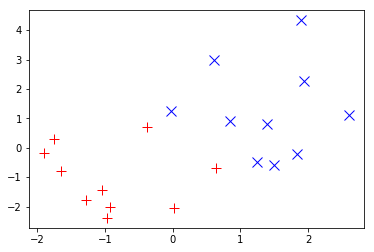

In [62]:
plt.plot(X[0,y==0],X[1,y==0],'bx',ms=10)
plt.plot(X[0,y==1],X[1,y==1],'r+',ms=10)

## Kozinec's Algorithm

In [63]:
def Kozinec(X, y):
    """
    w, b = perceptron(X, y, max_iterations)

    Perceptron algorithm.
    Implements the perceptron algorithm
    (http://en.wikipedia.org/wiki/Perceptron)

    :param X:               d-dimensional observations, (d, number_of_observations) np array
    :param y:               labels of the observations (0 or 1), (n,) np array
    :param max_iterations:  number of algorithm iterations (scalar)
    :return w:              w - weights, (d,) np array
    :return b:              b - bias, python float
    """
    a = np.ones((X.shape[0]+1,))
    z = np.zeros((X.shape[0]+1,))
    
    X = np.append(X, np.ones((1,X.shape[1])), axis = 0)
    
    X[:,np.where(y == 1)] *= -1
    
    is_dot = True
    while is_dot:
        x = X[:, np.where(X.T.dot(a) <= 0)[0]]
        if x.shape[1]:
            x = x[:,0]
            k = a-x
            x2 = np.random.randn(X.shape[0])  # take a random vector
            x2 -= x2.dot(k) * k             # make it orthogonal to k
            x2 /= np.linalg.norm(x2) 
            a = x2*x.dot(a)/np.linalg.norm(k)/2
        else: 
            is_dot = False
            break
            
    return a[:-1], a[-1]

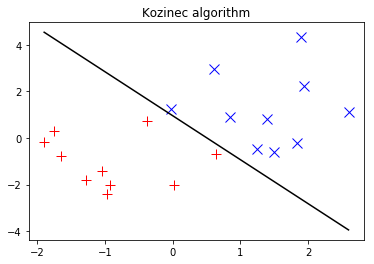

In [64]:
w, b = Kozinec(X, y)
# Show the data and the resulting linear classifier
plt.figure()
plt.plot(X[0,y==0],X[1,y==0],'bx',ms=10)
plt.plot(X[0,y==1],X[1,y==1],'r+',ms=10)
x_bound =[np.min(X[0]), np.max(X[0])]
xs = np.linspace(x_bound[0], x_bound[1])
ys = -(xs*w[0] +b)/w[1]
plt.plot(xs,ys,'k-')
plt.title('Kozinec algorithm')
plt.savefig('kozinec_linear.png')

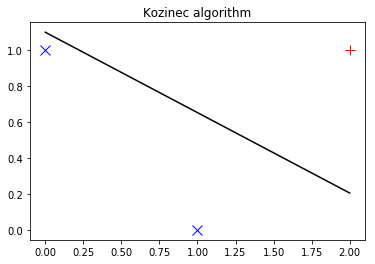

In [12]:
# Testing/Debugging data
Xt = np.array([[1, 0], [0, 1], [2, 1]], dtype=np.float32).T
yt = np.array([0, 0, 1])
w, b = Kozinec(Xt, yt)
# Show the data and the resulting linear classifier
plt.figure()
plt.plot(Xt[0,yt==0],Xt[1,yt==0],'bx',ms=10)
plt.plot(Xt[0,yt==1],Xt[1,yt==1],'r+',ms=10)
x_bound =[np.min(Xt[0]), np.max(Xt[0])]
xs = np.linspace(x_bound[0], x_bound[1])
ys = -(xs*w[0] +b)/w[1]
plt.plot(xs,ys,'k-')
plt.title('Kozinec algorithm')
plt.show()

##  Multi-class Perceptron

https://courses.cs.washington.edu/courses/csep573/14sp/slides/18-ML-perceptron.pdf

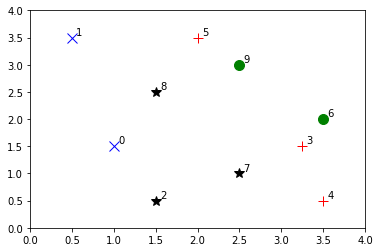

In [13]:
Xm = np.array([[1,1.5],
               [0.5,3.5],
               [1.5,0.5],
               [3.25,1.5],
               [3.5,0.5],
               [2,3.5],
               [3.5,2],
               [2.5,1],
               [1.5,2.5],
               [2.5,3]
              ], dtype=np.float32).T
ym = np.array([0,0,3,1,1,1,2,3,3,2])
plt.plot(Xm[0,ym==0],Xm[1,ym==0],'bx',ms=10)
plt.plot(Xm[0,ym==1],Xm[1,ym==1],'r+',ms=10)
plt.plot(Xm[0,ym==2],Xm[1,ym==2],'go',ms=10)
plt.plot(Xm[0,ym==3],Xm[1,ym==3],'k*',ms=10)
plt.xlim(0,4)
plt.ylim(0,4)
for i, x in enumerate(Xm.T):
    plt.annotate(i, x+0.05)
plt.show()

In [14]:
X = np.array([[3,1,2,3,3,4,5,6,6,1,1]
             ,[5,2,1,3,4,3,1,1,2,6,5]])
y = np.array([0,0,0,1,1,1,2,2,2,3,3])
nc = 4 #ilosc klas

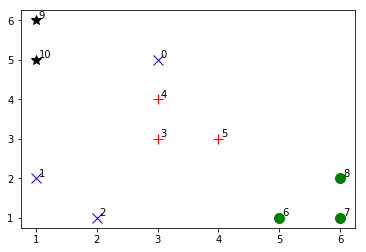

In [15]:
plt.plot(X[0,y==0],X[1,y==0],'bx',ms=10)
plt.plot(X[0,y==1],X[1,y==1],'r+',ms=10)
plt.plot(X[0,y==2],X[1,y==2],'go',ms=10)
plt.plot(X[0,y==3],X[1,y==3],'k*',ms=10)
for i, x in enumerate(X.T):
    plt.annotate(i, x+0.05)
plt.show()

In [16]:
def multi_class_perceptron(X, y, max_iterations):
    
    classes = np.unique(y)
    no_c = classes.shape[0]
    
    w = np.zeros((X.shape[0], no_c))
    b = np.zeros((no_c,))
    
    for ci in range(no_c):
        c = classes[ci]
        w[:,ci] = np.mean(X[:,y==c], axis = 1)
    
    for i in range(max_iterations):
        #predict with the current weights
        y_predict = np.argmax(w.T.dot(X) + b.reshape(no_c,1), axis = 0)
        idx_change = np.where(y_predict != y)[0]
        if idx_change.shape[0]:
            idx_change = idx_change[-1]
            w[:,y_predict[idx_change]] -= X[:,idx_change]
            b[y_predict[idx_change]] -= 1
            w[:,y[idx_change]] += X[:,idx_change]
            b[y[idx_change]] += 1
        else:
            break
        
    if i+1 < max_iterations:
        return w, b
    else:
        return [np.nan, np.nan]

In [17]:
w0, b0 = multi_class_perceptron(Xm, ym, 1000000)
w1, b1 = multi_class_perceptron(X, y, 1000000)

In [18]:
def background(w,b,mx,my):
    arr = []
    for i in np.arange(0,mx,mx/80):
        tmp_arr = []
        for j in np.arange(0,my,my/80):
            current_class = []
            c = np.argmax(w.T.dot([j,i]) + b)
            #x, y, colour
            tmp_arr.append([i,j,c])
        arr.append(tmp_arr)
    return np.array(arr)

In [19]:
arr0 = background(w0,b0,4,4)
arr0 = arr0.reshape((arr0.shape[0]*arr0.shape[1],3))
xt = arr0[:,1]
yt = arr0[:,0]
labelt = arr0[:,2]

arr1 = background(w1,b1,6,6)
arr1 = arr1.reshape((arr1.shape[0]*arr1.shape[1],3))
xt1 = arr1[:,1]
yt1 = arr1[:,0]
labelt1 = arr1[:,2]

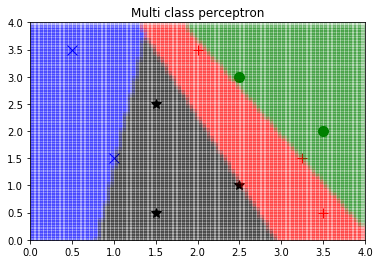

In [20]:
x_bound0 =[0, 4]
xs0 = np.linspace(x_bound[0], x_bound[1])

plt.plot(Xm[0,ym==0],Xm[1,ym==0],'bx',ms=10)
plt.plot(Xm[0,ym==1],Xm[1,ym==1],'r+',ms=10)
plt.plot(Xm[0,ym==2],Xm[1,ym==2],'go',ms=10)
plt.plot(Xm[0,ym==3],Xm[1,ym==3],'k*',ms=10)

plt.xlim(0,4)
plt.ylim(0,4)

plt.plot(xt[labelt == 0],yt[labelt == 0], 'bs', alpha = 0.15)
plt.plot(xt[labelt == 1],yt[labelt == 1], 'rs', alpha = 0.15)
plt.plot(xt[labelt == 2],yt[labelt == 2], 'gs', alpha = 0.15)
plt.plot(xt[labelt == 3],yt[labelt == 3], 'ks', alpha = 0.15)

plt.title('Multi class perceptron')
plt.savefig('Multiclass_perceptron03.png')

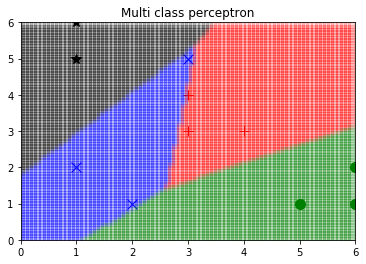

In [21]:
x_bound1 =[0, 6]
xs1 = np.linspace(x_bound[0], x_bound[1])

plt.plot(X[0,y==0],X[1,y==0],'bx',ms=10)
plt.plot(X[0,y==1],X[1,y==1],'r+',ms=10)
plt.plot(X[0,y==2],X[1,y==2],'go',ms=10)
plt.plot(X[0,y==3],X[1,y==3],'k*',ms=10)

plt.xlim(0,6)
plt.ylim(0,6)

plt.plot(xt1[labelt1 == 0],yt1[labelt1 == 0], 'bs', alpha = 0.15)
plt.plot(xt1[labelt1 == 1],yt1[labelt1 == 1], 'rs', alpha = 0.15)
plt.plot(xt1[labelt1 == 2],yt1[labelt1 == 2], 'gs', alpha = 0.15)
plt.plot(xt1[labelt1 == 3],yt1[labelt1 == 3], 'ks', alpha = 0.15)

plt.title('Multi class perceptron')
plt.savefig('Multiclass_perceptron04.png')

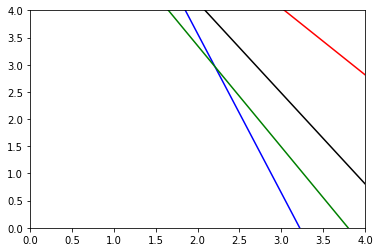

In [48]:
y1 = -(xs*w0[0,0] +b0[0])/w0[1,0]
y2 = -(xs*w0[0,1] +b0[1])/w0[1,1]
y3 = -(xs*w0[0,2] +b0[2])/w0[1,2]
y4 = -(xs*w0[0,3] +b0[3])/w0[1,3]
plt.plot(xs,y1,'b-')
plt.plot(xs,y2,'r-')
plt.plot(xs,y3,'g-')
plt.plot(xs,y4,'k-')

plt.xlim(0,4)
plt.ylim(0,4)

plt.show()